In [2]:
from fsds_100719.imports import *

fsds_1007219  v0.5.13 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re
# import fs

In [7]:
import os,sys
os.listdir("../scraped_student_info/")

['.DS_Store',
 'df_students_with_progress.csv',
 'progress',
 'df_students_jmi.csv']

In [8]:
df_students = pd.read_csv("../scraped_student_info/df_students_with_progress.csv")
df_students

,student_name,slack_url,learn_url,github_url,mailto_url,projects_url,grad_dash_url,cohort_lead,ed_coach,last_active,...,career_coach,section,ed_coach_avail,ed_coach_used,cohort,pacing,grad_date,commitment_level,lives_in,progress_csv
0,Acusio Bivona,slack://user?team=learn-co&id=,http://learn.co/coachcooz,http://github.com/coachcooz,mailto:acusio13@gmail.com,https://learn.co/portfolio-projects/student-da...,https://learn.co/graduation/student-dashboard/...,James Irving,Dara Paoletti,12/23/19,...,Not currently,Data Science,11,3,online-ds-pt-100719,Part Time,"[('2020-08-15', '')]",['Part Time'],"['Los Angeles, California, United States']",../scraped_student_info/progress/learn_progres...
1,Andrea Osika,slack://user?team=learn-co&id=andio (Andi Osika),http://learn.co/andiosika,http://github.com/andiosika,mailto:andiosika@gmail.com,https://learn.co/portfolio-projects/student-da...,https://learn.co/graduation/student-dashboard/...,[],Dara Paoletti,12/23/19,...,Not currently,Data Science,11,2,online-ds-pt-100719,Part Time,[],[],[],../scraped_student_info/progress/learn_progres...
2,Darius Fuller,slack://user?team=learn-co&id=Darius F.,http://learn.co/dfuller22,http://github.com/dfuller22,mailto:d_full22@yahoo.com,https://learn.co/portfolio-projects/student-da...,https://learn.co/graduation/student-dashboard/...,James Irving,Dara Paoletti,12/24/19,...,Not currently,Data Science,11,2,online-ds-pt-100719,Part Time,"[('2020-08-31', '')]",['Part Time'],"['Seattle, Washington, United States']",../scraped_student_info/progress/learn_progres...
3,Devin Belden,slack://user?team=learn-co&id=Devin B,http://learn.co/devinbelden,http://github.com/devinbelden,mailto:devin.belden.28@gmail.com,https://learn.co/portfolio-projects/student-da...,https://learn.co/graduation/student-dashboard/...,James Irving,Dara Paoletti,12/20/19,...,Not currently,Data Science,11,5,online-ds-ft-100719,Full Time,"[('2020-03-31', '')]",['Full Time'],['United States'],../scraped_student_info/progress/learn_progres...
4,Douglas Steen,slack://user?team=learn-co&id=Doug Steen,http://learn.co/douglaspsteen,http://github.com/douglaspsteen,mailto:douglaspsteen@gmail.com,https://learn.co/portfolio-projects/student-da...,https://learn.co/graduation/student-dashboard/...,James Irving,Dara Paoletti,12/21/19,...,Not currently,Data Science,11,3,online-ds-ft-100719,Full Time,"[('2020-03-31', '')]",['Full Time'],"['Grapevine, Texas, United States']",../scraped_student_info/progress/learn_progres...
5,Ice Asortse,slack://user?team=learn-co&id=,http://learn.co/dantarshi,http://github.com/dantarshi,mailto:dantarshi@gmail.com,https://learn.co/portfolio-projects/student-da...,https://learn.co/graduation/student-dashboard/...,James Irving,Dara Paoletti,12/24/19,...,Not currently,Data Science,11,2,online-ds-ft-100719,Full Time,"[('2020-03-31', '')]",['Full Time'],"['Pittsburgh, Pennsylvania, United States']",../scraped_student_info/progress/learn_progres...
6,Jamaal Smith,slack://user?team=learn-co&id=Jamaal Smith,http://learn.co/jdsmithwes,http://github.com/jdsmithwes,mailto:jdsmith1906@gmail.com,https://learn.co/portfolio-projects/student-da...,https://learn.co/graduation/student-dashboard/...,James Irving,Dara Paoletti,12/21/19,...,Not currently,Data Science,11,2,online-ds-ft-100719,Full Time,[],[],[],../scraped_student_info/progress/learn_progres...
7,John Kline,slack://user?team=learn-co&id=John Kline,http://learn.co/katahdin28,http://github.com/katahdin28,mailto:johnmkline@gmail.com,https://learn.co/portfolio-projects/student-da...,https://learn.co/graduation/student-dashboard/...,James Irving,Dara Paoletti,12/19/19,...,Not currently,Data Science,11,1,online-ds-ft-100719,Full Time,"[('2020-03-15', '')]",['Full Time'],['United States'],../scraped_student_info/progress/learn_progres...
8,John Lemaster,slack://user?team=learn-co&id=John Lemaster,http://learn.co/lemaster1,http://github.com/lemaster1,mailto:heylemaster@gmail.com,https://learn.co/portfolio-projects/student-da...,https://learn

In [127]:
csv_file = df_students['progress_csv'][14]
csv_file

'../scraped_student_info/progress/learn_progress_Terry Ollila.csv'

In [128]:
df = pd.read_csv(csv_file,index_col=0)

# df[df.duplicated(keep=False)]
df.drop_duplicates(inplace=True)
df


,dates,lesson
0,"Tuesday, Dec 24th",Regression Analysis using Linear Algebra and N...
1,"Tuesday, Dec 24th",Solving Systems of Linear Equations with NumPy...
2,"Tuesday, Dec 24th",Solving Systems of Linear Equations with NumPy...
3,"Monday, Dec 23rd",Pure Python vs. Numpy - Lab
4,"Monday, Dec 23rd",Properties of Dot Product - Lab
...,...,...
450,"Thursday, Sep 5th",Python Intro To Strings
451,"Thursday, Sep 5th",Instant Data Science
452,"Thursday, Sep 5th",The Web is Made of HTML
453,"Thursday, Sep 5th",Welcome to Bootcamp Prep


In [240]:
df._metadata

[]

In [246]:
df_students.columns

Index(['student_name', 'slack_url', 'learn_url', 'github_url', 'mailto_url',
       'projects_url', 'grad_dash_url', 'cohort_lead', 'ed_coach',
       'last_active', 'completed_lessons', 'joined', 'career_coach', 'section',
       'ed_coach_avail', 'ed_coach_used', 'cohort', 'pacing', 'grad_date',
       'commitment_level', 'lives_in', 'progress_csv'],
      dtype='object')

In [251]:
def get_progress_df(df_students,row=14):
    """Returns the dataframe with the specified students progress csv.
    Adds a new attribute to df called .student with the students name (for tracking purposes)"""
    csv_file = df_students['progress_csv'][row]
    df = pd.read_csv(csv_file,index_col=0)
    # df[df.duplicated(keep=False)]
    df.drop_duplicates(inplace=True)
    
    name = df_students['student_name'][row]
    df.student=name
    return df

df = get_progress_df(df_students,row=12)
df

,dates,lesson
0,"Thursday, Dec 12th",Exploring Your Data
1,"Wednesday, Dec 11th",Obtaining Your Data
2,"Tuesday, Dec 10th",Introduction
3,"Thursday, Dec 5th",AB Testing
4,"Friday, Nov 22nd",Introduction
...,...,...
319,"Thursday, Aug 22nd",Understanding Links in HTML
320,"Thursday, Aug 22nd",Using Images in HTML
321,"Thursday, Aug 22nd",Basics of HTML
322,"Thursday, Aug 22nd",The Web is Made of HTML


In [252]:
df.student

'Ru Kein'

In [253]:
test_date = df['dates'][0]
test_date

'Thursday, Dec 12th'

In [254]:
import re
import datetime as dt

test_date = 'Monday, Dec 23rd, 2019'
# exp = r"\w*, (\w*) (\d+)"
exp=r"\w*, (\w*) (\d+)(\d*)"
matches = re.findall(exp,test_date)
matches

[('Dec', '23', '')]

In [131]:
def match_year(x):
    """Used as an apply to the raw dates column scraped from learn with 'th','rd' etc as part of dates
    and also missing the year (but only for current year).
    
    Args:
        date_str (str): date as a string from learn progress column
        
    Returns:
        date (datetime): proper datetime object with year filled in"""
    import re
    import datetime as dt

    exp=r"\w*, (\w*) (\d+)(\d*)"
    matches = re.findall(exp,x)
    date_pieces = list(matches[0])
    
    if len(date_pieces[-1])==0:
        date_pieces[-1] = dt.datetime.now().year

    new_date = f"{date_pieces[0]}, {date_pieces[1]} {date_pieces[2]}"
    return pd.to_datetime(new_date)
    

df['datetime'] = df['dates'].apply(match_year)
df

,dates,lesson,datetime
0,"Tuesday, Dec 24th",Regression Analysis using Linear Algebra and N...,2019-12-24
1,"Tuesday, Dec 24th",Solving Systems of Linear Equations with NumPy...,2019-12-24
2,"Tuesday, Dec 24th",Solving Systems of Linear Equations with NumPy...,2019-12-24
3,"Monday, Dec 23rd",Pure Python vs. Numpy - Lab,2019-12-23
4,"Monday, Dec 23rd",Properties of Dot Product - Lab,2019-12-23
...,...,...,...
450,"Thursday, Sep 5th",Python Intro To Strings,2019-09-05
451,"Thursday, Sep 5th",Instant Data Science,2019-09-05
452,"Thursday, Sep 5th",The Web is Made of HTML,2019-09-05
453,"Thursday, Sep 5th",Welcome to Bootcamp Prep,2019-09-05


# PLOTTING DIFFERENT TIME FREQUENCIES

In [137]:
import matplotlib.dates as mdates

In [207]:
def plot_daily_progress(df,figsize=(12,6)):
    """Resamples progress df as days then plots and returns lessons per day."""\
    try:
    daily = df.set_index('datetime').resample('D')['lesson'].count()
    ax = daily.plot()
    fig=ax.get_figure()
    fig.set_size_inches(figsize)
    
    fonts_labels= dict(size=14,family='serif')
    
    ax.set_title('DAILY PROGRESS',fontdict=dict(size=20,family='serif'))
    ax.set_ylabel('# of Lessons/Day',fontdict=fonts_labels)
    ax.set_xlabel('')

    weeks = mdates.DayLocator(interval=7)
    months = mdates.MonthLocator()

    ## Format Minor ticks for weeks
    ax.xaxis.set_minor_locator(weeks)
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%d'))
    ax.xaxis.grid(which='minor',ls=':')
#     ax.xaxis.set_tick_params(which)

    ## Format Major Ticks for Months
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))
    ax.xaxis.grid(which='major',lw=1,zorder=0,color='black')
    

    ax.xaxis.set_tick_params(which='major',
                             labelrotation=90,
                             pad=5,labelsize=12,
                             length=20,direction='out')#,fontfamily='serif')
    return fig,ax

(<Figure size 864x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2a26a6d8>)

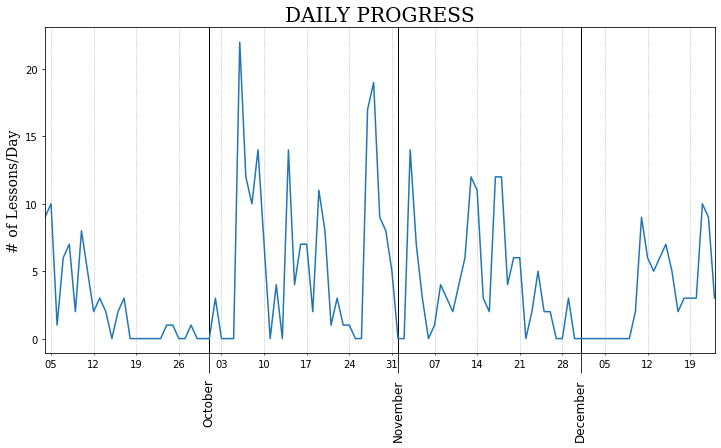

In [208]:
plot_daily_progress(df)

In [255]:
# weekly = df.set_index('datetime').resample('W')['lesson'].count()
# ax=weekly.plot(style='.b')

# # days = mdates.DayLocator(interval=)
# days = mdates.AutoDateLocator()
# days.intervald['DAILY'] =[7]

# months = mdates.MonthLocator()

# ## Format Minor ticks for weeks
# ax.xaxis.set_minor_locator(days)
# ax.xaxis.set_minor_formatter(mdates.DateFormatter('%d'))
# ax.xaxis.grid(which='minor',ls=':')

# # ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))
# # ax.xaxis.set_major_locator(months)
# # ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))
# # ax.xaxis.grid(which='major',lw=1,zorder=0,color='black')

In [256]:
# plot_weekly_progress(df)

In [233]:
# def plot_weekly_progress(df,figsize=(12,6)):
#     """Resamples progress df as days then plots and returns lessons per day."""
    
    
#     weekly = df.set_index('datetime').resample('W')['lesson'].count()
#     ax = weekly.plot()
    
#     fig=ax.get_figure()
#     fig.set_size_inches(figsize)
    
#     fonts_labels= dict(size=14,family='serif')
    
#     ax.set_title('DAILY PROGRESS',fontdict=dict(size=20,family='serif'))
#     ax.set_ylabel('# of Lessons/Day',fontdict=fonts_labels)
#     ax.set_xlabel('')

#     days = mdates.DayLocator(interval=7)
#     months = mdates.MonthLocator()

#     ## Format Minor ticks for weeks
#     ax.xaxis.set_minor_locator(days)
#     ax.xaxis.set_minor_formatter(mdates.DateFormatter('%d'))
#     ax.xaxis.grid(which='minor',ls=':')
# #     ax.xaxis.set_tick_params(which)

#     ## Format Major Ticks for Months
#     ax.xaxis.set_major_locator(months)
#     ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))
#     ax.xaxis.grid(which='major',lw=1,zorder=0,color='black')
    

#     ax.xaxis.set_tick_params(which='major',
#                              labelrotation=90,
#                              pad=5,labelsize=12,
#                              length=20,direction='out')#,fontfamily='serif')
#     return fig,ax

# ADDING MOD / SECTION INFO FOR CURRICULUM v2 


- Write a function to separate concatenate columns as rows and extract separate Mod / Section /Lesson Name columns 

In [257]:
curric = pd.read_csv('curriculum_v2.csv')
curric

,MODULE 1,MODULE 2,MODULE 3,MODULE 4,MODULE 5,MODULE 6
0,"Mod 1, Section 01 - Getting Started with Data ...","Mod 2, Section 09 - SQL and Relational Databases","Mod 3, Section 17 - Combinatorics and Probability","Mod 4, Section 25 - A Complete Data Science Pr...","Mod 5, Section 33 - K Nearest Neighbors","Mod 6, Section 42 - Graph Theory"
1,"Mod 1, Section 02 - Git, Github and Being Part...","Mod 2, Section 10 - Object Oriented Programming","Mod 3, Section 18 - Statistical Distributions","Mod 4, Section 26 - Linear Algebra","Mod 5, Section 34 - Decision Trees","Mod 6, Section 43 - Foundations of Natural Lan..."
2,"Mod 1, Section 03 - Importing and Statistical ...","Mod 2, Section 11 - JSON and XML","Mod 3, Section 19 - Central Limit Theorem and ...","Mod 4, Section 27 - Calculus, Cost Function, a...","Mod 5, Section 35 - Ensemble Methods","Mod 6, Section 44 - Introduction to Deep Learning"
3,"Mod 1, Section 04 - Python Libraries: Numpy an...","Mod 2, Section 12 - Accessing Data through APIs","Mod 3, Section 20 - Hypothesis Testing","Mod 4, Section 28 - Extensions to Linear Models","Mod 5, Section 36 - Support Vector Machines","Mod 6, Section 45 - Multi-Layer Perceptrons"
4,"Mod 1, Section 05 - Data Cleaning in Pandas","Mod 2, Section 13 - HTML, CSS and Web Scraping","Mod 3, Section 21 - Statistical Power and Anova","Mod 4, Section 29 - Introduction to Logistic R...","Mod 5, Section 37 - Principal Component Analysis","Mod 6, Section 46 - Tuning Neural Networks"
5,"Mod 1, Section 06 - Data Visualization","Mod 2, Section 14 - More SQL","Mod 3, Section 22 - AB Testing","Mod 4, Section 30 - In-depth Logistic Regression","Mod 5, Section 38 - Clustering","Mod 6, Section 47 - Introduction to Convolutio..."
6,"Mod 1, Section 07 - Introduction to Linear Reg...","Mod 2, Section 15 - Other Database structures","Mod 3, Section 23 - Bayesian Statistics","Mod 4, Section 31 - Working with Time Series Data","Mod 5, Section 39 - Building a Machine Learnin...","Mod 6, Section 48 - Transfer Learning"
7,"Mod 1, Section 08 - Multiple Regression and Mo...","Mod 2, Section 16 - Scraping and Storing your ...","Mod 3, Section 24 - Resampling and Monte Carlo...","Mod 4, Section 32 - Time Series Modeling","Mod 5, Section 40 - Big Data in PySpark","Mod 6, Section 49 - Deep NLP - Word Embeddings"
8,Mod 1 - Office Hours,NaN,Mod 3 - Office Hours,Mod 4 - Office Hours,"Mod 5, Section 41 - Recommendation Systems","Mod 6, Section 50 - Operationalizing code and AWS"
9,NaN,NaN,NaN,NaN,Mod 5 - Office Hours,NaN


In [381]:
cols = curric.columns

df_merged = pd.DataFrame()

series_list = []
for col in cols:
    series_list.append(curric[col])
    
df_merged['source'] = pd.concat(series_list,axis=0)
df_merged.dropna(inplace=True)
df_merged = df_merged.reset_index(drop=True)
df_merged.head()

,source
0,"Mod 1, Section 01 - Getting Started with Data ..."
1,"Mod 1, Section 02 - Git, Github and Being Part..."
2,"Mod 1, Section 03 - Importing and Statistical ..."
3,"Mod 1, Section 04 - Python Libraries: Numpy an..."
4,"Mod 1, Section 05 - Data Cleaning in Pandas"
5,"Mod 1, Section 06 - Data Visualization"
6,"Mod 1, Section 07 - Introduction to Linear Reg..."
7,"Mod 1, Section 08 - Multiple Regression and Mo..."
8,Mod 1 - Office Hours
9,"Mod 2, Section 09 - SQL and Relational Databases"


In [398]:
import re
def get_mod_section(row,source_col='source'):
    try:
        x = row[source_col]
    except:
        matches=[('','','')]

        
    if isinstance(x,str):
        matches = re.findall(r"(Mod \d).*(Section \d+).*- ([A-Za-z ]+)",x)
    if len(matches)==0:
        matches=[('','','')]
#     try:

    mod,sect,title=matches[0]
#     print(mod,sect,title,sep='|')
    row['mod'] = mod
    row['sect'] = sect
    row['title'] = title

    return row#mod,sect,title#matches[0]
#     except:
#         return matches
    
# get_mod_section(curric.iloc[0,0])
# res = mod1.apply(get_mod_section)#lambda x: re.findall(r"(Mod \d).*(Section \d+).*- ([A-Za-z ]+)",x))
# res

In [399]:
df_merged= df_merged.apply(lambda x: get_mod_section(x),axis=1)
# df_merged['Mod'] = df_merged.apply(lambda x: x[0])
df_merged

,source,mod,sect,title
0,"Mod 1, Section 01 - Getting Started with Data ...",Mod 1,Section 01,Getting Started with Data Science
1,"Mod 1, Section 02 - Git, Github and Being Part...",Mod 1,Section 02,Git
2,"Mod 1, Section 03 - Importing and Statistical ...",Mod 1,Section 03,Importing and Statistical Analysis of Data
3,"Mod 1, Section 04 - Python Libraries: Numpy an...",Mod 1,Section 04,Python Libraries
4,"Mod 1, Section 05 - Data Cleaning in Pandas",Mod 1,Section 05,Data Cleaning in Pandas
5,"Mod 1, Section 06 - Data Visualization",Mod 1,Section 06,Data Visualization
6,"Mod 1, Section 07 - Introduction to Linear Reg...",Mod 1,Section 07,Introduction to Linear Regression
7,"Mod 1, Section 08 - Multiple Regression and Mo...",Mod 1,Section 08,Multiple Regression and Model Validation
8,Mod 1 - Office Hours,,,
9,"Mod 2, Section 09 - SQL and Relational Databases",Mod 2,Section 09,SQL and Relational Databases


In [344]:
get_mod_section(df_merged[0])

TypeError: expected string or bytes-like object

In [337]:
# def apply_mod_section_to_row(row):
#     matches = get_mod_section(str(row))
#     if len(matches)==3:
#         mod,sect,title = matches
        
#         row_out=pd.Series({'Source':row,'Mod':mod,'Sect':sect,'Title':title})
        
#         return row_out
#     else:
#         print('No match.')
#         return row

In [338]:
# curric_full = curric['MODULE 1'].apply(apply_mod_section_to_row)
# curric_full

ValueError: not enough values to unpack (expected 3, got 1)

# CREATING DF TO AGGREGATE

In [236]:
weekly = df.set_index('datetime').resample('W')['lesson'].count()
weekly

datetime
2019-09-08    26
2019-09-15    29
2019-09-22     5
2019-09-29     3
2019-10-06     3
2019-10-13    69
2019-10-20    45
2019-10-27    14
2019-11-03    58
2019-11-10    32
2019-11-17    40
2019-11-24    42
2019-12-01    12
2019-12-08     0
2019-12-15    28
2019-12-22    33
2019-12-29    12
Freq: W-SUN, Name: lesson, dtype: int64

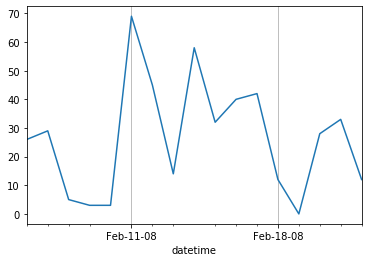

In [136]:
ax = weekly.plot()
fig = ax.get_figure()

import matplotlib.dates as mdates
import datetime
days = mdates.DayLocator(interval=7)
ax.xaxis.set_major_locator(days) #mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d-%y'))

ax.xaxis.grid()
# fig
# ax.axis

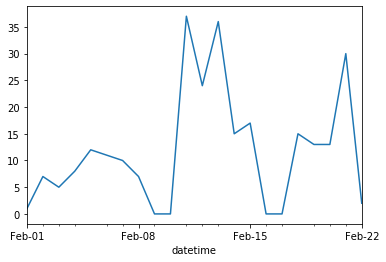

In [120]:
import matplotlib.dates as mdates
import datetime
days = mdates.DayLocator(interval=7)
ax.xaxis.set_major_locator(days) #mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
fig

## EXAMPLE DATE FORMATTING CODE
```python 
### FROM CAPSTONE PLOTTING FUNCTION
import matplotlib.dates as mdates
import datetime

# Instantiate Locators to be used
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()#interval=2)  # every month
quarters = mdates.MonthLocator(interval=3)#interval=2)  # every month

# Define various date formatting to be used
monthsFmt = mdates.DateFormatter('%Y-%b')
yearsFmt = mdates.DateFormatter('%Y') #'%Y')
yr_mo_day_fmt = mdates.DateFormatter('%Y-%m')
monthDayFmt = mdates.DateFormatter('%m-%d-%y')


## AX2 SET TICK LOCATIONS AND FORMATTING

# Set locators (since using for both location and formatter)
auto_major_loc = mdates.AutoDateLocator(minticks=5)
auto_minor_loc = mdates.AutoDateLocator(minticks=10)

# Set Major X Axis Ticks
ax1.xaxis.set_major_locator(auto_major_loc)
ax1.xaxis.set_major_formatter(mdates.AutoDateFormatter(auto_major_loc))

# Set Minor X Axis Ticks
ax1.xaxis.set_minor_locator(auto_minor_loc)
ax1.xaxis.set_major_formatter(mdates.AutoDateFormatter(auto_minor_loc))


ax1.tick_params(axis='x',which='both',rotation=30)
ax1.grid(axis='x',which='major')

ax2.xaxis.set_major_locator(months) #mdates.DayLocator(interval=5))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y')) #monthsFmt) #mdates.DateFormatter('%m-%Y')) #AutoDateFormatter(locator=locator))#yearsFmt)

# Minor X-Axis Ticks
ax2.xaxis.set_minor_locator(mdates.DayLocator(interval=5))#,interval=5))
ax2.xaxis.set_minor_formatter(mdates.DateFormatter('%d')) #, fontdict={'weight':'bold'})

# Changing Tick spacing and rotation.
ax2.tick_params(axis='x',which='major',rotation=90, direction='inout',length=10, pad=5)
ax2.tick_params(axis='x',which='minor',length=4,pad=2, direction='in') #,horizontalalignment='right')#,ha='left')
ax2.grid(axis='x',which='major')
         ```

In [121]:
# orig_locator = ax.xaxis.get_major_locator()
# orig_formatter = ax.xaxis.get_major_formatter()
# orig_ticks = ax.xaxis.get_major_ticks()
# tick = orig_ticks[0]
# help(tick)

In [97]:
locator= mpl.dates.DateLocator()
ax.xaxis.set_major_locator(locator)
fig

<Figure size 432x288 with 1 Axes>

In [101]:
# plt.show()

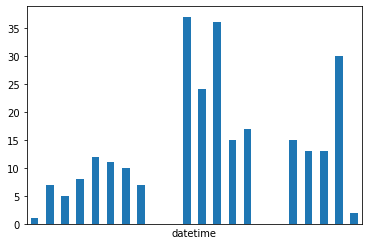

In [89]:
# mdates
ax.xaxis.set_major_locator(mpl.dates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter("%b-%d"))
fig
# ax.xaxis.get_major_formatter()

In [72]:
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%b-%D'))

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x120855ae8> (for post_execute):


ValueError: DateFormatter found a value of x=0, which is an illegal date; this usually occurs because you have not informed the axis that it is plotting dates, e.g., with ax.xaxis_date()

ValueError: DateFormatter found a value of x=0, which is an illegal date; this usually occurs because you have not informed the axis that it is plotting dates, e.g., with ax.xaxis_date()

<Figure size 432x288 with 1 Axes>

# JEFF:


In [95]:
df = pd.read_csv('./lessons/grad/andrewwongls.csv')

In [96]:
df.head()

,Unnamed: 0,dates,lesson
0,69,"Saturday, Aug 17th",Getting Started on Your Resume
1,70,"Saturday, Jun 22nd",Section Recap
2,71,"Saturday, Jun 22nd",Bidirectional Sequence Models - Lab
3,72,"Saturday, Jun 22nd",Bidirectional Sequence Models
4,73,"Friday, May 31st",LSTMs and GRUs - Lab


In [97]:
df.tail()

,Unnamed: 0,dates,lesson
1063,1132,"Friday, Oct 19th 2018",Problems Data Science Can Solve
1064,1133,"Friday, Oct 19th 2018",Introduction
1065,1134,"Friday, Oct 19th 2018",Introduction
1066,1135,"Friday, Oct 19th 2018",Welcome
1067,1136,"Friday, Oct 19th 2018",Welcome


In [98]:
df[df['lesson'] == 'Welcome']

,Unnamed: 0,dates,lesson
1066,1135,"Friday, Oct 19th 2018",Welcome
1067,1136,"Friday, Oct 19th 2018",Welcome


In [99]:
df.shape

(1068, 3)

In [100]:
df.drop_duplicates(subset = ['lesson'], inplace = True)

In [101]:
df.head()

,Unnamed: 0,dates,lesson
0,69,"Saturday, Aug 17th",Getting Started on Your Resume
1,70,"Saturday, Jun 22nd",Section Recap
2,71,"Saturday, Jun 22nd",Bidirectional Sequence Models - Lab
3,72,"Saturday, Jun 22nd",Bidirectional Sequence Models
4,73,"Friday, May 31st",LSTMs and GRUs - Lab


In [102]:
df.tail()

,Unnamed: 0,dates,lesson
1058,1127,"Saturday, Oct 20th 2018",Working With Lessons On Learn
1059,1128,"Saturday, Oct 20th 2018",Working with Lessons on Learn
1060,1129,"Friday, Oct 19th 2018",The Data Science Process
1062,1131,"Friday, Oct 19th 2018",Problems Data Science Can Solve
1066,1135,"Friday, Oct 19th 2018",Welcome


In [103]:
df.shape

(629, 3)

In [104]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [105]:
test_19 = df.loc[0, 'dates']
test_18 = df.loc[1066, 'dates']

In [106]:
test_19, test_18

('Saturday, Aug 17th', 'Friday, Oct 19th 2018')

In [107]:
mon, day = test_19.split(',')[1].strip().split(' ')

In [108]:
month = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 
        'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

In [109]:
month[mon]

8

In [110]:
day

'17th'

In [111]:
def update_date(date_value):
    split_date = date_value.split(',')[1].strip().split(' ')
    day_extract = re.findall(r'\d+', split_date[1])[0]
    if len(split_date) == 2:
        return (f"{month[split_date[0]]}/{day_extract}/2019")
    else:
        return (f"{month[split_date[0]]}/{day_extract}/{split_date[2]}")

In [112]:
update_date(test_19)

'8/17/2019'

In [113]:
update_date(test_18)

'10/19/2018'

In [114]:
df.head()

,dates,lesson
0,"Saturday, Aug 17th",Getting Started on Your Resume
1,"Saturday, Jun 22nd",Section Recap
2,"Saturday, Jun 22nd",Bidirectional Sequence Models - Lab
3,"Saturday, Jun 22nd",Bidirectional Sequence Models
4,"Friday, May 31st",LSTMs and GRUs - Lab


In [115]:
new_dates = []

for x in df['dates']:
    new_dates.append(update_date(x))

In [116]:
df['new_dates'] = new_dates

In [117]:
df.head()

,dates,lesson,new_dates
0,"Saturday, Aug 17th",Getting Started on Your Resume,8/17/2019
1,"Saturday, Jun 22nd",Section Recap,6/22/2019
2,"Saturday, Jun 22nd",Bidirectional Sequence Models - Lab,6/22/2019
3,"Saturday, Jun 22nd",Bidirectional Sequence Models,6/22/2019
4,"Friday, May 31st",LSTMs and GRUs - Lab,5/31/2019


In [118]:
df['new_dates'] = pd.to_datetime(df['new_dates'])

In [119]:
df.head()

,dates,lesson,new_dates
0,"Saturday, Aug 17th",Getting Started on Your Resume,2019-08-17
1,"Saturday, Jun 22nd",Section Recap,2019-06-22
2,"Saturday, Jun 22nd",Bidirectional Sequence Models - Lab,2019-06-22
3,"Saturday, Jun 22nd",Bidirectional Sequence Models,2019-06-22
4,"Friday, May 31st",LSTMs and GRUs - Lab,2019-05-31


In [120]:
df.dtypes

dates                object
lesson               object
new_dates    datetime64[ns]
dtype: object

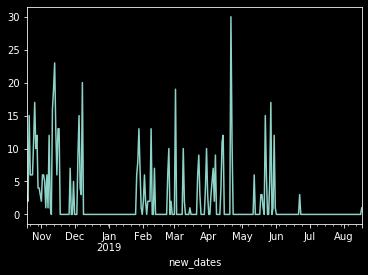

In [121]:
df.set_index('new_dates').resample('D')['lesson'].count().plot(kind = 'line')

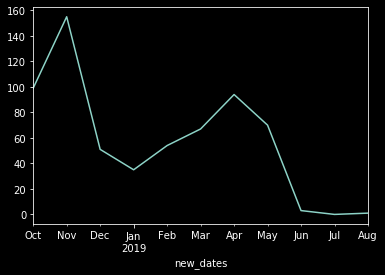

In [122]:
df.set_index('new_dates').resample('M')['lesson'].count().plot(kind = 'line')

In [123]:
awong = df.set_index('new_dates').resample('1D')['lesson'].count()

In [124]:
awong = pd.DataFrame(awong)

In [125]:
awong.reset_index(inplace = True)

In [126]:
awong.drop('new_dates', axis = 1, inplace = True)

In [127]:
awong.columns = ['Andrew_Wong']

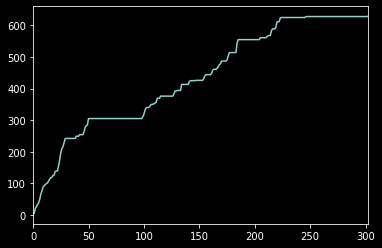

In [128]:
awong['Andrew_Wong'].cumsum().plot(kind = 'line')

In [129]:
mike = pd.read_csv('./lessons/grad/cytmike.csv')

In [130]:
mike

,dates,lesson
0,"Monday, Dec 2nd",Capstone Project
1,"Tuesday, Nov 26th",Managing Your Job Search
2,"Wednesday, Nov 13th",CSC Weekly Activity
3,"Wednesday, Nov 13th",Job Search Action Plan
4,"Wednesday, Nov 13th",Confidence
...,...,...
559,"Thursday, Feb 7th",Your First Data Science Codealong!
560,"Thursday, Feb 7th",Introduction to Variables: Variable Assignment
561,"Thursday, Feb 7th",Working with Lessons on Learn - Lab
562,"Thursday, Feb 7th",Working with Lessons on Learn


In [131]:
new_dates = []

for x in mike['dates']:
    new_dates.append(update_date(x))
mike['new_dates'] = new_dates
mike['new_dates'] = pd.to_datetime(mike['new_dates'])

In [132]:
mike_c = mike.set_index('new_dates').resample('1D')['lesson'].count()

In [133]:
mike_c = pd.DataFrame(mike_c)

In [134]:
mike_c.reset_index(inplace = True)
mike_c.drop('new_dates', axis = 1, inplace = True)
mike_c.columns = ['Michael_Cheng']

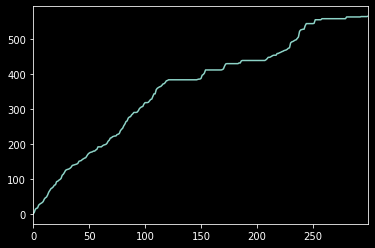

In [135]:
mike_c['Michael_Cheng'].cumsum().plot(kind = 'line')

In [136]:
kyle = pd.read_csv('./lessons/grad/kylejohnson363.csv')

In [137]:
kyle.shape

(1074, 2)

In [138]:
kyle.drop_duplicates(subset = ['lesson'], inplace = True)

In [139]:
kyle.shape

(639, 2)

In [140]:
new_dates = []

for x in kyle['dates']:
    new_dates.append(update_date(x))
kyle['new_dates'] = new_dates
kyle['new_dates'] = pd.to_datetime(kyle['new_dates'])

In [141]:
kyle_j = kyle.set_index('new_dates').resample('1D')['lesson'].count()

In [142]:
kyle_j = pd.DataFrame(kyle_j)

In [143]:
kyle_j.reset_index(inplace = True)
kyle_j.drop('new_dates', axis = 1, inplace = True)
kyle_j.columns = ['Kyle_Johnson']

In [144]:
matt = pd.read_csv('./lessons/grad/matthewsparr.csv')

In [145]:
new_dates = []

for x in matt['dates']:
    new_dates.append(update_date(x))
matt['new_dates'] = new_dates
matt['new_dates'] = pd.to_datetime(matt['new_dates'])

In [146]:
matt_s = matt.set_index('new_dates').resample('1D')['lesson'].count()

In [147]:
matt_s = pd.DataFrame(matt_s)

In [148]:
matt_s.reset_index(inplace = True)
matt_s.drop('new_dates', axis = 1, inplace = True)
matt_s.columns = ['Matt_Sparr']

In [149]:
ray = pd.read_csv('./lessons/grad/rwilleynyc.csv')

In [150]:
ray.shape

(1069, 2)

In [151]:
ray.drop_duplicates(subset = ['lesson'], inplace = True)

In [152]:
ray.shape

(633, 2)

In [153]:
new_dates = []

for x in ray['dates']:
    new_dates.append(update_date(x))
ray['new_dates'] = new_dates
ray['new_dates'] = pd.to_datetime(ray['new_dates'])

In [154]:
ray_w = ray.set_index('new_dates').resample('1D')['lesson'].count()

In [155]:
ray_w = pd.DataFrame(ray_w)

In [156]:
ray_w.reset_index(inplace = True)
ray_w.drop('new_dates', axis = 1, inplace = True)
ray_w.columns = ['Raymond_Wiley']

In [157]:
steve = pd.read_csv('./lessons/grad/stevhliu.csv')

In [158]:
new_dates = []

for x in steve['dates']:
    new_dates.append(update_date(x))
steve['new_dates'] = new_dates
steve['new_dates'] = pd.to_datetime(steve['new_dates'])

In [159]:
steve_l = steve.set_index('new_dates').resample('1D')['lesson'].count()

In [160]:
steve_l = pd.DataFrame(steve_l)

In [161]:
steve_l.reset_index(inplace = True)
steve_l.drop('new_dates', axis = 1, inplace = True)
steve_l.columns = ['Steven_Liu']

In [162]:
df = pd.concat([awong, mike_c, kyle_j, matt_s, ray_w, steve_l], axis = 1)

In [164]:
df.to_csv('df.csv', index = False)

In [163]:
plt.style.use('dark_background')

Text(0.5, 1.0, 'Number of Lessons Completed by SP Graduates')

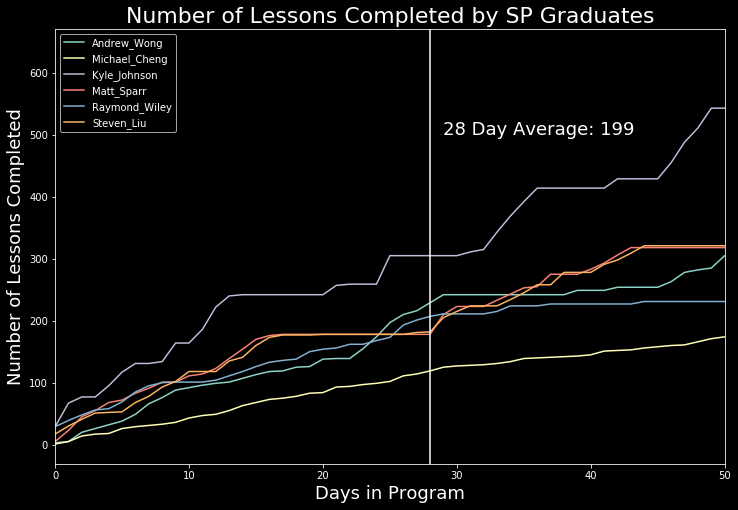

In [71]:

my_fig = df.cumsum().plot(kind = 'line', figsize = (12, 8))
my_fig.set_xlim(0, 50)
my_fig.axvline(28, color = 'white')
my_fig.text(29, 500, '28 Day Average: 199', fontsize = 18)
my_fig.set_ylabel('Number of Lessons Completed', fontsize = 18)
my_fig.set_xlabel('Days in Program', fontsize = 18)
my_fig.set_title('Number of Lessons Completed by SP Graduates', fontsize = 22)

In [73]:
df.head(28).sum().mean()

199.16666666666666

In [85]:
df.loc[0:29].sum().mean()

216.33333333333334

In [86]:
df.loc[30:60].sum().mean()

103.5

In [87]:
df.loc[61:90].sum().mean()

67.83333333333333

In [88]:
df.loc[91:120].sum().mean()

66.16666666666667

In [89]:
df.loc[121:150].sum().mean()

28.0

In [92]:
df.loc[151:180].sum().mean()

27.166666666666668